***Multiple Stock Prediction Using Deep Learning Network***
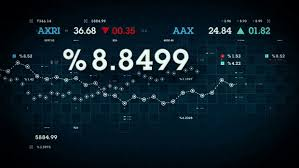
---



The goal : build a prediction model using long-short term memory architecture involving multiple time-series. 

In [1]:
#this program uses the LSTM to predict the closing price of 6 stocks
#Import the libraries
import math
import pandas_datareader as web
import pandas.testing
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from pandas.util.testing import assert_frame_equal

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  del sys.path[0]


In [2]:
#Get the stock quote 
stock = ['LHA.DE', 'AF.PA', 'MC.PA', 'RMS.PA' ,'FP.PA' ,'RDS-A']
df = web.DataReader(stock, data_source='yahoo', start='2020-01-01', end='2021-02-01') 
#Show the data 
df

Attributes Adj Close                      ...   Volume                      
Symbols       LHA.DE   AF.PA       MC.PA  ...   RMS.PA      FP.PA      RDS-A
Date                                      ...                               
2020-01-02    16.680  10.250  409.435028  ...  42679.0  4326276.0  3084700.0
2020-01-03    15.590   9.438  409.386200  ...  33911.0  4960724.0  3713000.0
2020-01-06    15.340   9.350  405.527740  ...  44451.0  7596924.0  3250100.0
2020-01-07    15.365   9.394  406.358032  ...  50766.0  5380020.0  2683500.0
2020-01-08    15.540   9.440  409.093109  ...  34952.0  4922510.0  2965800.0
...              ...     ...         ...  ...      ...        ...        ...
2021-01-26     9.854   4.740  508.000000  ...  52847.0  7282290.0  3597500.0
2021-01-27    10.265   4.869  506.399994  ...  62690.0  7779147.0  4863000.0
2021-01-28    10.910   5.024  517.000000  ...  46489.0  7588146.0  4464000.0
2021-01-29    10.645   4.879  498.299988  ...  67326.0  9125180.0  4772200.0
2021-02-01    10.735   4.863  507.700012  ...  40706.0  8174457.0  5945000.0

[280 rows x 36 columns]

In [3]:
df.shape

(280, 36)

Fitting all the closing prices of the series in a neural network architecture

Splitting into train-test and visualize the output.

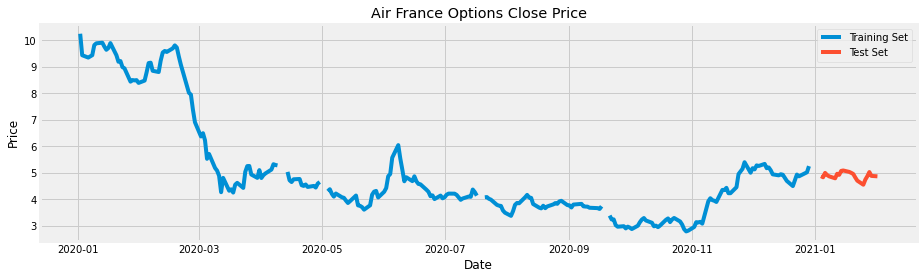

In [4]:
data = df[['Close']]
data = data.reset_index()
training_data = data[data['Date'] < pd.to_datetime('2020-12-30')].copy()
test_data = data[data['Date'] >= pd.to_datetime("2021-01-01")].copy()
training_data = training_data.set_index('Date')
test_data = test_data.set_index('Date')
plt.figure(figsize=(14,4))
plt.plot(training_data.Close['AF.PA'])
plt.plot(test_data.Close['AF.PA'])
plt.ylabel("Price")
plt.xlabel("Date")
plt.legend(["Training Set", "Test Set"])
plt.title("Air France Options Close Price")
plt.show()

In [5]:
data

Attributes       Date   Close          ...                                  
Symbols                LHA.DE   AF.PA  ...      RMS.PA      FP.PA      RDS-A
0          2020-01-02  16.680  10.250  ...  671.000000  49.814999  59.740002
1          2020-01-03  15.590   9.438  ...  675.400024  50.380001  60.209999
2          2020-01-06  15.340   9.350  ...  669.799988  50.439999  60.959999
3          2020-01-07  15.365   9.394  ...  678.200012  50.110001  60.400002
4          2020-01-08  15.540   9.440  ...  684.200012  50.240002  59.689999
..                ...     ...     ...  ...         ...        ...        ...
275        2021-01-26   9.854   4.740  ...  870.000000  35.980000  38.389999
276        2021-01-27  10.265   4.869  ...  854.200012  35.825001  37.980000
277        2021-01-28  10.910   5.024  ...  861.599976  35.814999  38.240002
278        2021-01-29  10.645   4.879  ...  842.599976  34.895000  36.889999
279        2021-02-01  10.735   4.863  ...  854.200012  34.555000  36.619999

[280 rows x 7 columns]

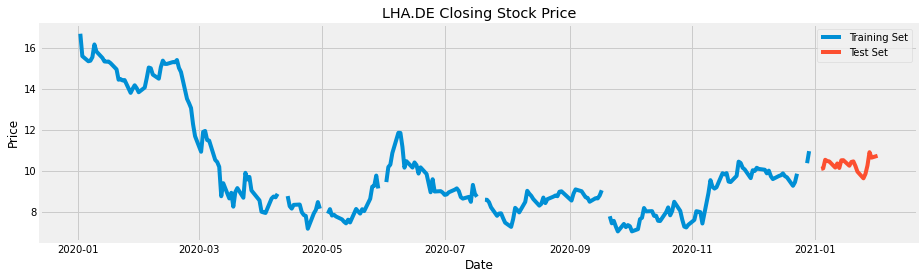

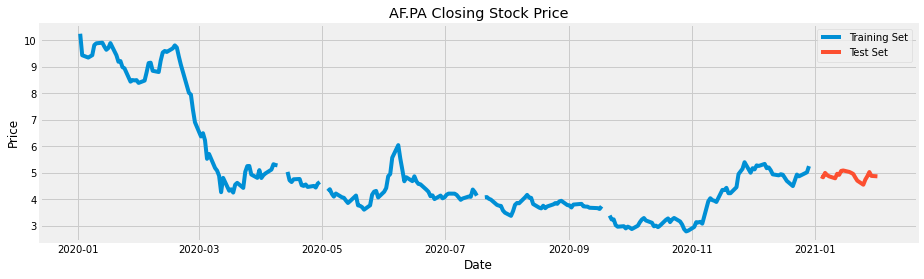

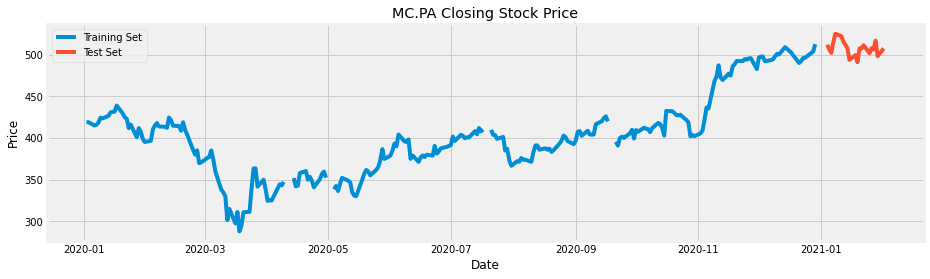

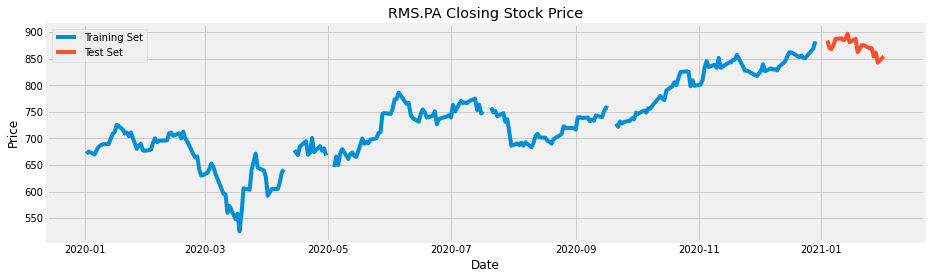

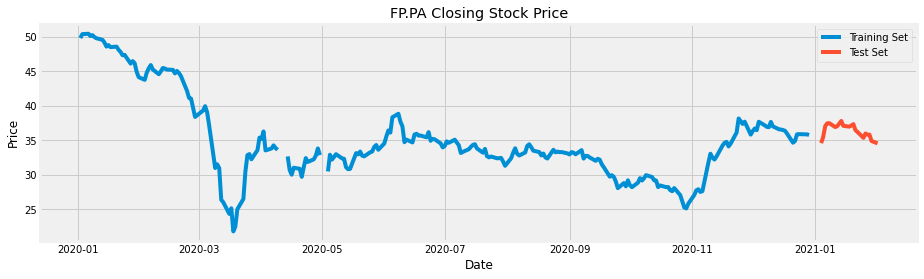

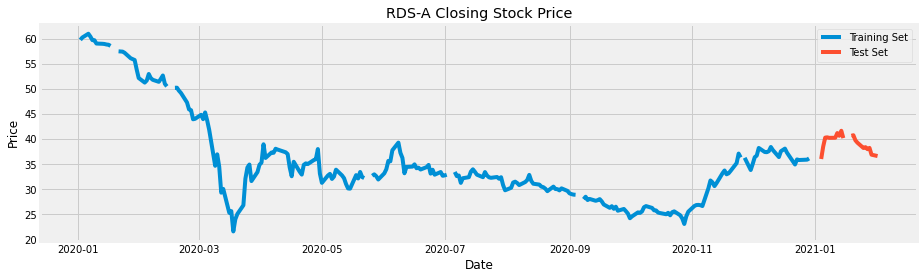

In [6]:
for i in stock:
    plt.figure(figsize=(14,4))
    plt.plot(training_data.Close[i])
    plt.plot(test_data.Close[i])
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Closing Stock Price")

# Data **normalization**
MinMaxScaler rescales the data set such that all feature values are in the range [0, 1]. It normally preserve the shape of the data set. 

In [ ]:
minmax = MinMaxScaler(feature_range = (0, 1))
minmax_single = MinMaxScaler(feature_range = (0, 1))
train_scaled = np.concatenate ([minmax.fit_transform (training_data.Close[['LHA.DE', 'AF.PA', 'MC.PA', 'RMS.PA' ,'FP.PA']].values), minmax_single.fit_transform(training_data.Close[['RDS-A']].values)], axis = 1)
train_scaled = pd.DataFrame(train_scaled, columns = training_data.columns) 
train_scaled 

Attributes     Close                                                  
Symbols       LHA.DE     AF.PA     MC.PA    RMS.PA     FP.PA     RDS-A
0           0.974004  0.980031  0.031350  0.045590  0.701808  0.892349
1           1.000000  0.999566  0.038452  0.050545  0.716269  0.902922
2           0.992453  0.976558  0.052413  0.052527  0.742878  0.908689
3           0.973166  0.979163  0.071516  0.061695  0.752856  0.911572
4           0.985744  1.000000  0.051923  0.062686  0.758930  0.911957
..               ...       ...       ...       ...       ...       ...
727         0.060545  0.044105  0.945873  0.997027  0.181779  0.076701
728         0.041929  0.032558  0.915258  1.000000  0.152133  0.061707
729         0.023983  0.022487  0.901053  0.998018  0.126970  0.049404
730         0.009811  0.007293  0.819251  0.930624  0.100506  0.028451
731         0.008050  0.000000  0.827333  0.958870  0.096457  0.057862

[732 rows x 6 columns]

In [ ]:
train_scaled.describe() # validating min & max values

Attributes       Close              ...                        
Symbols         LHA.DE       AF.PA  ...       FP.PA       RDS-A
count       713.000000  722.000000  ...  724.000000  713.000000
mean          0.436380    0.466705  ...    0.674405    0.647313
std           0.262572    0.223117  ...    0.224458    0.272193
min           0.000000    0.000000  ...    0.000000    0.000000
25%           0.262055    0.364690  ...    0.628670    0.549789
50%           0.443816    0.523268  ...    0.745987    0.751634
75%           0.640252    0.628408  ...    0.815510    0.824683
max           1.000000    1.000000  ...    1.000000    1.000000

[8 rows x 6 columns]

In [ ]:
## finding all columns that have nan:
droping_list_all=[]
for j in range(0,6):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5]

In [ ]:
# filling nan with mean in any columns

for j in range(0,6):        
        train_scaled.iloc[:,j]=train_scaled.iloc[:,j].fillna(train_scaled.iloc[:,j].mean())


In [ ]:
# another sanity check to make sure that there are not more any nan
train_scaled.isnull().sum()

Attributes  Symbols
Close       LHA.DE     0
            AF.PA      0
            MC.PA      0
            RMS.PA     0
            FP.PA      0
            RDS-A      0
dtype: int64

In [ ]:
train_scaled.shape[0]

257

# ***Shaping data for LSTM***

In [ ]:
train_scaled = train_scaled.values
n_lags = int(60)
X_train = []
y_train = []
for i in range(n_lags, train_scaled.shape[0]):

  X_train.append(train_scaled[i-n_lags:i])
  y_train.append(train_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 6))
# Check the shape (again) before start training
shape_chk = []

for i in stock:

  index = {}
  index["X_train"] = X_train.shape
  index["y_train"] = y_train.shape
  shape_chk.append(index)
pd.DataFrame(shape_chk, index=stock)


,X_train,y_train
LHA.DE,"(672, 60, 6)","(672,)"
AF.PA,"(672, 60, 6)","(672,)"
MC.PA,"(672, 60, 6)","(672,)"
RMS.PA,"(672, 60, 6)","(672,)"
FP.PA,"(672, 60, 6)","(672,)"
RDS-A,"(672, 60, 6)","(672,)"


In [ ]:
print(X_train.shape)

(672, 60, 6)


In [ ]:
#X_train

1st architecture

In [ ]:
from keras.layers import Dense, Softmax, Dropout
# The LSTM architecture
regressor = Sequential()
# 1st layer with Dropout regularisation
regressor.add(LSTM(units=20, return_sequences=True, activation = 'relu', input_shape=(X_train.shape[1],6)))
regressor.add(Dropout(0.2))

regressor.add(Dense(units=1, activation = 'relu') )
# Compiling LSTM 
regressor.compile(optimizer='adam', loss='mean_squared_error')
# Fitting to the training set
for i in stock:

  print("Fitting to", i)
  regressor.fit(X_train, y_train, epochs=30, batch_size=3)

Fitting to LHA.DE
Epoch 1/30
224/224 [==============================] - 9s 30ms/step - loss: 0.0743
Epoch 2/30
223/224 [============================>.] - ETA: 0s - loss: 0.0163

KeyboardInterrupt: ignored

2nd architecture

In [ ]:
"""model = Sequential()
model.add(LSTM(units=50, return_sequences=True,activation = 'relu',input_shape=(X_train.shape[1],6)))
model.add(LSTM(units=50,activation = 'relu' ,return_sequences=False))
model.add(Dense(units=25,activation = 'relu'))
model.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')
# Fitting to the training set
for i in stock:

  print("Fitting to", i)
  regressor.fit(X_train, y_train, epochs=30, batch_size=3)"""

# **Predicting Future Stock using the Test Set**
To predict future prices we need to do couple of data processing task; 1) merge the training set and the test set on the 0 axis,
2) set the n_lags as time steps,
3) transform the new data set
4) reshape the data set.

In [ ]:
total_data = pd.concat((training_data, test_data), axis = 0)
inputs = total_data[len(total_data) - len(test_data) - 60:]
test_scaled = np.concatenate([minmax.transform(inputs.Close[['LHA.DE', 'AF.PA', 'MC.PA', 'RMS.PA' ,'FP.PA']]),minmax_single.transform(inputs.Close[['RDS-A']])], axis = 1)
print('Shape of test data:', test_scaled.shape)
# shaping data from neural network
X_test = []
y_test = []
for i in range(60, test_scaled.shape[0]):
  X_test.append(test_scaled[i-n_lags:i])
  y_test.append(test_scaled[i,0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 6))


Shape of test data: (103, 6)


In [ ]:
test_scaled.shape[0]

103

In [ ]:
"""pred_result = {}
for i in stock:
    y_true = minmax_single[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(regressor.predict(testset[i]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result[i] = {}
    pred_result[i]["True"] = y_true
    pred_result[i]["Pred"] = y_pred
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MSE {:10.4f}".format(i,MSE))
    plt.plot(y_true)
    plt.plot(y_pred)"""

'pred_result = {}\nfor i in stock:\n    y_true = minmax_single[i].inverse_transform(testset[i]["y"].reshape(-1,1))\n    y_pred = scaler[i].inverse_transform(regressor.predict(testset[i]["X"]))\n    MSE = mean_squared_error(y_true, y_pred)\n    pred_result[i] = {}\n    pred_result[i]["True"] = y_true\n    pred_result[i]["Pred"] = y_pred\n    \n    plt.figure(figsize=(14,6))\n    plt.title("{} with MSE {:10.4f}".format(i,MSE))\n    plt.plot(y_true)\n    plt.plot(y_pred)'

In [ ]:
X_test.T.reshape(2, -1)

In [ ]:

#predicted_price

In [ ]:
predicted_price = regressor.predict(X_test)
predicted_price = minmax_single.inverse_transform(predicted_price[1])
predicted_price = pd.DataFrame(predicted_price)
predicted_price.rename(columns = {0: 'Air France_predicted'}, inplace=True)
predicted_price = predicted_price.round(decimals=0)
#predicted_price.index = test_data.index
predicted_price

,Air France_predicted
0,28.0
1,28.0
2,28.0
3,28.0
4,27.0
5,27.0
6,27.0
7,26.0
8,26.0
9,26.0


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
plt.figure(figsize = (14,5))
mse = mean_squared_error(y_test, predicted_price)
plt.plot(predicted_price['Air France_predicted'], color = 'red', label = 'Predicted Air France closing price')
plt.plot(test_data.Close['RDS-A'], color = 'green', label = 'Actual Air France closing price')
plt.title ("Air France Composite closing Price prediction- with MSE {:10.4f}".format(mse))
plt.xlabel('Time')
plt.ylabel('Price (USD)')
plt.legend()

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)',fontsize=18)
plt.show()


In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Volume History')
plt.plot(df['Volume'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Volume',fontsize=18)
plt.show()

In [ ]:
#as we can notice from the two figures above, when the price of the stock decrease the volume increase (the hikes in the volume match the drops in the stock price)
#we can train our text analysis based on these events ( to see what happens during these time for the price to drop)

In [ ]:
#Create a new dataframe with only the 'Close' column
#data = df.filter(['Close'])
#Converting the dataframe to a numpy array
data = df [['Close']]
data = data.reset_index('Date')

dataset = data.values
#Get /Compute the number of rows to train the model on
# len return the nb of items in a container
training_data_len = math.ceil( len(dataset) *.8)  #now the training_data_len contains 80% of the dataset
training_data_len

In [ ]:
data

In [ ]:
dataset

In [ ]:
#Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 
scaled_data = scaler.fit_transform(dataset)

In [ ]:
#Create the scaled training data set 
train_data = scaled_data[0:training_data_len  , : ]
#Create the training dataset (from which the model will learn)
# we want to train the data as follows:( it takes the 60 values to see the 61st value )
#so the first column in the ‘x_train’ data set will contain values from index 0 to 59/ the second column will contain values from index 1 to 60 and then we shift by one value
# Y_train will get the 61th value/ 62th value etc ...
#Split the data into x_train and y_train data sets
x_train=[] #independent train data
y_train = [] #dependent train data
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])

In [ ]:
#Convert x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [ ]:
#Build the LSTM network model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dense(units=25))
model.add(Dense(units=1))

In [ ]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

In [ ]:
#Test data set
test_data = scaled_data[training_data_len - 60: , : ]
#Create the x_test and y_test data sets
x_test = []
y_test =  dataset[training_data_len : , : ] #Get all of the rows from index 1357 to the rest and all of the columns (in this case it's only column 'Close'), so from 1357 to 1696
# (because the date is been split into training (0.8) and testing(0.2) )
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [ ]:
#Convert x_test to a numpy array 
x_test = np.array(x_test)

In [ ]:
#Reshape the data into the shape accepted by the LSTM
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#Getting the models predicted price values
predictions = model.predict(x_test) 
predictions = scaler.inverse_transform(predictions) # to remove the scaling 

In [ ]:
#Calculate/Get the value of RMSE which evaluate the accurancy of the model (the smaller the better )
rmse=np.sqrt(np.mean(((predictions- y_test)**2)))
rmse

In [ ]:
#Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Show the valid and predicted prices
#it stops on 21/08/2020 because it's the weekend
valid

In [ ]:
#Get the quote
apple_quote = web.DataReader('MC.PA', data_source='yahoo', start='2014-01-01', end='2020-08-21')
#Create a new dataframe
new_df = apple_quote.filter(['Close'])
#Get teh last 60 day closing price 
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append teh past 60 days
X_test.append(last_60_days_scaled)
#Convert the X_test data set to a numpy array
X_test = np.array(X_test)
#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
#Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling 
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


In [ ]:
#Get the quote
apple_quote2 = web.DataReader('MC.PA', data_source='yahoo', start='2019-12-20', end='2019-12-21')
print(apple_quote2['Close'])

#we need to correct the date shown below 

In [ ]:
#we need to change the code so that it takes 61th day prediction to predict the 62th day et so on and so forth 
#because here the codes only takes in account the real values (2months of real values to predict the 61st dday's price)

# THE BEST SOLUTION

In [44]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn-whitegrid')

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

In [46]:
#Get the stock quote 
stockList = ['LHA.DE', 'AF.PA', 'MC.PA', 'RMS.PA' ,'FP.PA' ,'RDS-A']
df = web.DataReader(stock, data_source='yahoo', start='2020-01-01', end='2021-02-01') 
#Show the data 
df

Attributes Adj Close                      ...   Volume                      
Symbols       LHA.DE   AF.PA       MC.PA  ...   RMS.PA      FP.PA      RDS-A
Date                                      ...                               
2020-01-02    16.680  10.250  409.435028  ...  42679.0  4326276.0  3084700.0
2020-01-03    15.590   9.438  409.386200  ...  33911.0  4960724.0  3713000.0
2020-01-06    15.340   9.350  405.527740  ...  44451.0  7596924.0  3250100.0
2020-01-07    15.365   9.394  406.358032  ...  50766.0  5380020.0  2683500.0
2020-01-08    15.540   9.440  409.093109  ...  34952.0  4922510.0  2965800.0
...              ...     ...         ...  ...      ...        ...        ...
2021-01-26     9.854   4.740  508.000000  ...  52847.0  7282290.0  3597500.0
2021-01-27    10.265   4.869  506.399994  ...  62690.0  7779147.0  4863000.0
2021-01-28    10.910   5.024  517.000000  ...  46489.0  7588146.0  4464000.0
2021-01-29    10.645   4.879  498.299988  ...  67326.0  9125180.0  4772200.0
2021-02-01    10.735   4.863  507.700012  ...  40706.0  8174457.0  5945000.0

[280 rows x 36 columns]

In [47]:
data

Attributes       Date   Close          ...                                  
Symbols                LHA.DE   AF.PA  ...      RMS.PA      FP.PA      RDS-A
0          2020-01-02  16.680  10.250  ...  671.000000  49.814999  59.740002
1          2020-01-03  15.590   9.438  ...  675.400024  50.380001  60.209999
2          2020-01-06  15.340   9.350  ...  669.799988  50.439999  60.959999
3          2020-01-07  15.365   9.394  ...  678.200012  50.110001  60.400002
4          2020-01-08  15.540   9.440  ...  684.200012  50.240002  59.689999
..                ...     ...     ...  ...         ...        ...        ...
275        2021-01-26   9.854   4.740  ...  870.000000  35.980000  38.389999
276        2021-01-27  10.265   4.869  ...  854.200012  35.825001  37.980000
277        2021-01-28  10.910   5.024  ...  861.599976  35.814999  38.240002
278        2021-01-29  10.645   4.879  ...  842.599976  34.895000  36.889999
279        2021-02-01  10.735   4.863  ...  854.200012  34.555000  36.619999

[280 rows x 7 columns]

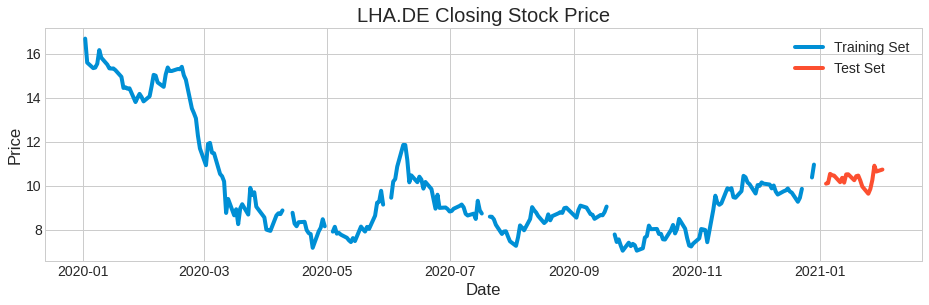

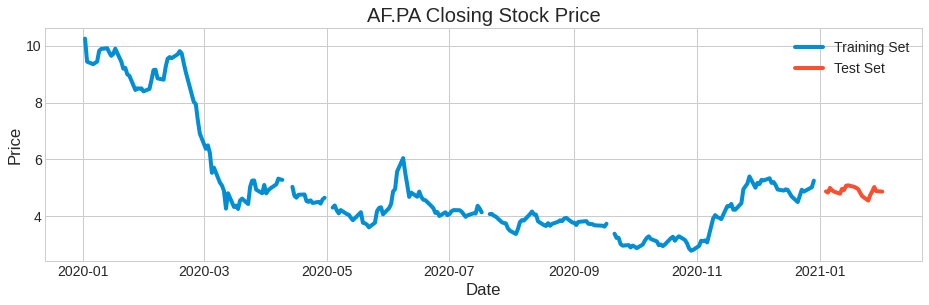

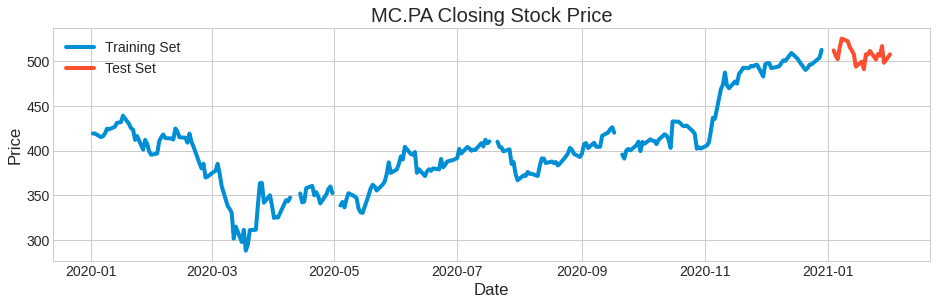

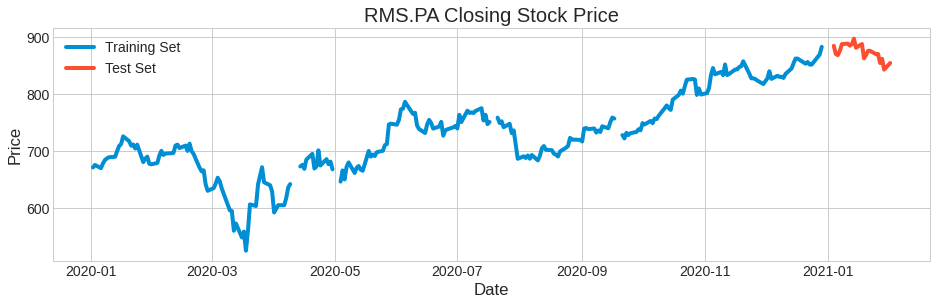

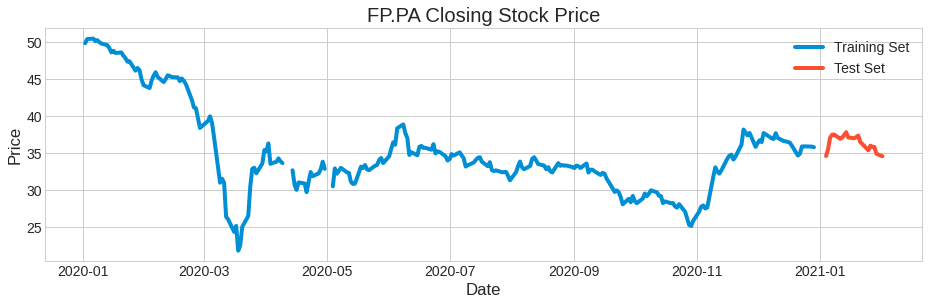

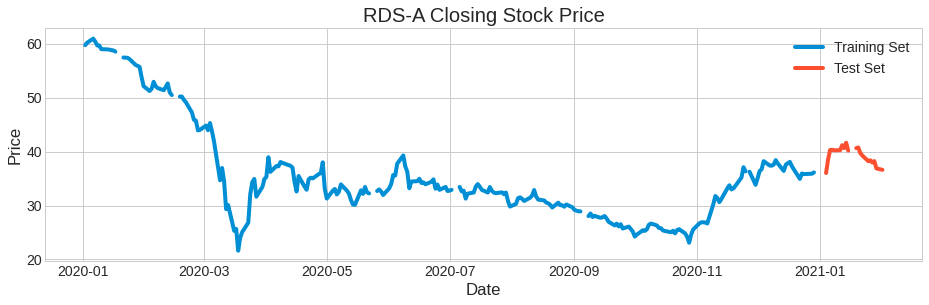

In [48]:
for i in stock:
    plt.figure(figsize=(14,4))
    plt.plot(training_data.Close[i])
    plt.plot(test_data.Close[i])
    plt.ylabel("Price")
    plt.xlabel("Date")
    plt.legend(["Training Set", "Test Set"])
    plt.title(i + " Closing Stock Price")

In [49]:
for j in range(0,6):        
        training_data.Close.iloc[:,j]=training_data.Close.iloc[:,j].fillna(training_data.Close.iloc[:,j].mean())
        test_data.Close.iloc[:,j]=test_data.Close.iloc[:,j].fillna(test_data.Close.iloc[:,j].mean())

In [50]:
# Scaling the training set
transform_train = {}
transform_test = {}
scaler = {}

for num, i in enumerate(stock):
    sc = MinMaxScaler(feature_range=(0,1))
    a0 = np.array(training_data.Close[i])
    a1 = np.array(test_data.Close[i])
    a0 = a0.reshape(a0.shape[0],1)
    a1 = a1.reshape(a1.shape[0],1)
    transform_train[i] = sc.fit_transform(a0)
    transform_test[i] = sc.fit_transform(a1)
    scaler[i] = sc
    
del a0
del a1



In [51]:
for i in transform_train.keys():
    print(i, transform_train[i].shape)
print("\n")    
for i in transform_test.keys():
    print(i, transform_test[i].shape)

LHA.DE (257, 1)
AF.PA (257, 1)
MC.PA (257, 1)
RMS.PA (257, 1)
FP.PA (257, 1)
RDS-A (257, 1)


LHA.DE (21, 1)
AF.PA (21, 1)
MC.PA (21, 1)
RMS.PA (21, 1)
FP.PA (21, 1)
RDS-A (21, 1)


In [57]:
"""LHA.DE (732, 1)
AF.PA (732, 1)
MC.PA (732, 1)
RMS.PA (732, 1)
FP.PA (732, 1)
RDS-A (732, 1)


LHA.DE (43, 1)
AF.PA (43, 1)
MC.PA (43, 1)
RMS.PA (43, 1)
FP.PA (43, 1)
RDS-A (43, 1)"""


trainset = {}
testset = {}
for j in stockList:
    trainset[j] = {}
    X_train = []
    y_train = []
    for i in range(10,257):
        X_train.append(transform_train[j][i-10:i,0])
        y_train.append(transform_train[j][i,0])
    X_train, y_train = np.array(X_train), np.array(y_train)
    trainset[j]["X"] = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
    trainset[j]["y"] = y_train
    
    testset[j] = {}
    X_test = []
    y_test = []    
    for i in range(10, 21):
        X_test.append(transform_test[j][i-10:i,0])
        y_test.append(transform_test[j][i,0])
    X_test, y_test = np.array(X_test), np.array(y_test)
    testset[j]["X"] = np.reshape(X_test, (X_test.shape[0], X_train.shape[1], 1))
    testset[j]["y"] = y_test

In [58]:
arr_buff = []
for i in stock:
    buff = {}
    buff["X_train"] = trainset[i]["X"].shape
    buff["y_train"] = trainset[i]["y"].shape
    buff["X_test"] = testset[i]["X"].shape
    buff["y_test"] = testset[i]["y"].shape
    arr_buff.append(buff)

pd.DataFrame(arr_buff, index=stockList)

,X_train,y_train,X_test,y_test
LHA.DE,"(247, 10, 1)","(247,)","(11, 10, 1)","(11,)"
AF.PA,"(247, 10, 1)","(247,)","(11, 10, 1)","(11,)"
MC.PA,"(247, 10, 1)","(247,)","(11, 10, 1)","(11,)"
RMS.PA,"(247, 10, 1)","(247,)","(11, 10, 1)","(11,)"
FP.PA,"(247, 10, 1)","(247,)","(11, 10, 1)","(11,)"
RDS-A,"(247, 10, 1)","(247,)","(11, 10, 1)","(11,)"


In [59]:
from keras.layers import Dense, Softmax, Dropout
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop', loss='mean_squared_error')
# Fitting to the training set$$
for i in stockList:
    print("Fitting to", i)
    regressor.fit(trainset[i]["X"], trainset[i]["y"], epochs=30, batch_size=3)

Fitting to LHA.DE
Epoch 1/30
83/83 [==============================] - 10s 7ms/step - loss: 0.0331
Epoch 2/30
83/83 [==============================] - 1s 7ms/step - loss: 0.0213
Epoch 3/30
83/83 [==============================] - 1s 7ms/step - loss: 0.0198
Epoch 4/30
83/83 [==============================] - 1s 7ms/step - loss: 0.0153
Epoch 5/30
83/83 [==============================] - 1s 8ms/step - loss: 0.0146
Epoch 6/30
83/83 [==============================] - 1s 7ms/step - loss: 0.0164
Epoch 7/30
83/83 [==============================] - 1s 7ms/step - loss: 0.0176
Epoch 8/30
83/83 [==============================] - 1s 7ms/step - loss: 0.0175
Epoch 9/30
83/83 [==============================] - 1s 7ms/step - loss: 0.0151
Epoch 10/30
83/83 [==============================] - 1s 8ms/step - loss: 0.0145
Epoch 11/30
83/83 [==============================] - 1s 8ms/step - loss: 0.0149
Epoch 12/30
83/83 [==============================] - 1s 7ms/step - loss: 0.0103
Epoch 13/30
83/83 [===========

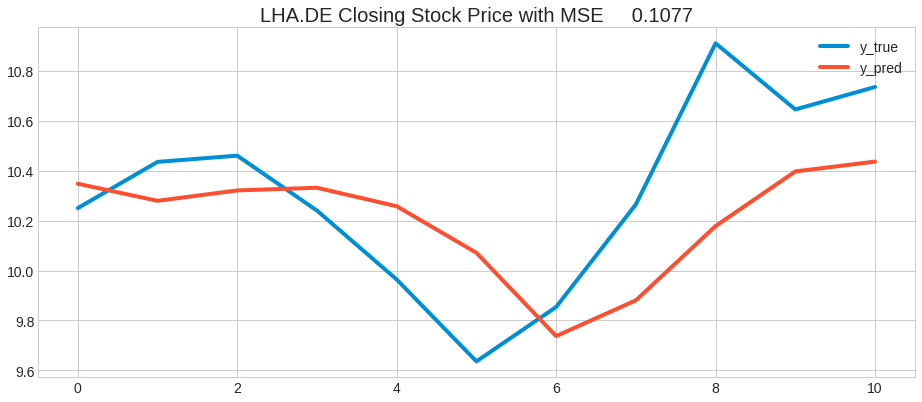

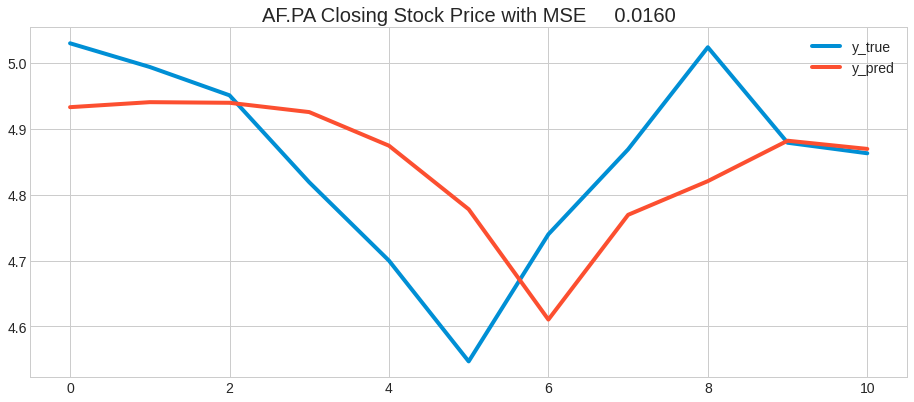

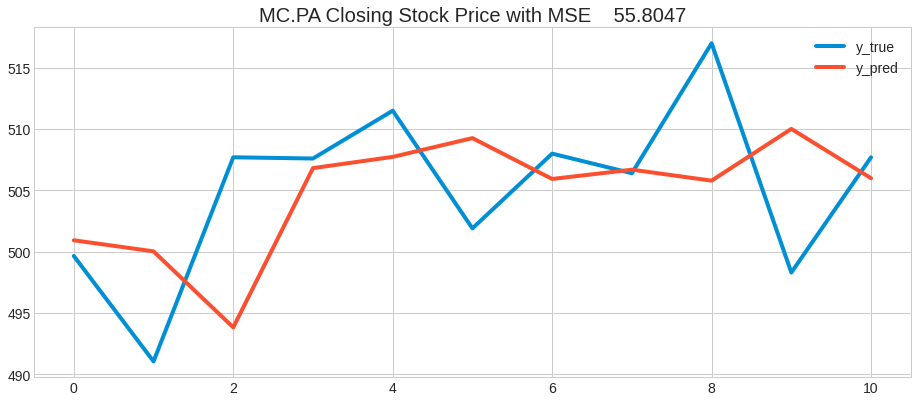

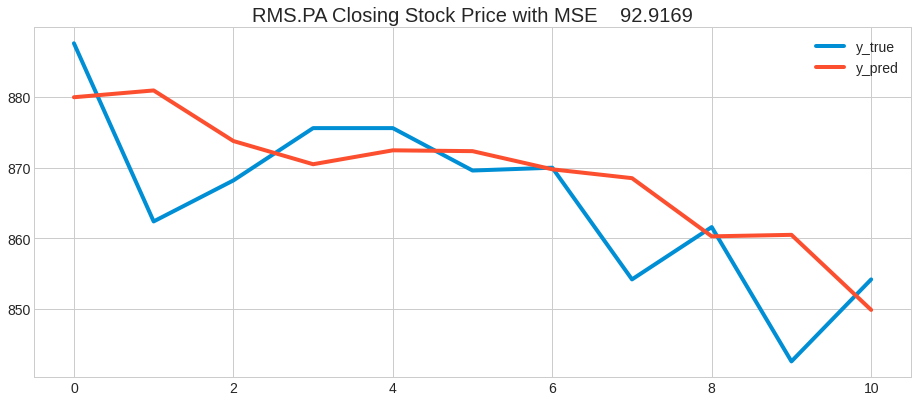

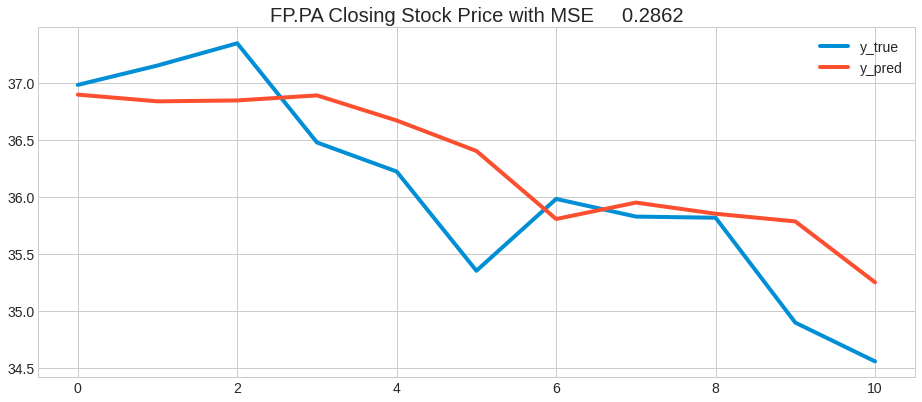

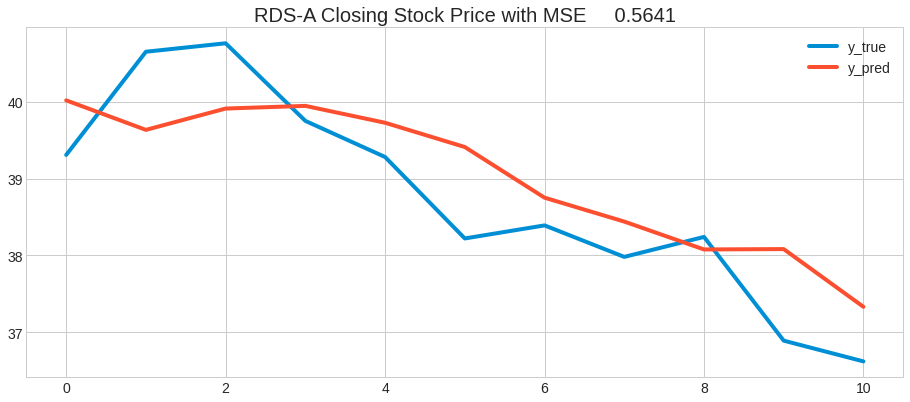

In [63]:
pred_result = {}
for i in stock:
    y_true = scaler[i].inverse_transform(testset[i]["y"].reshape(-1,1))
    y_pred = scaler[i].inverse_transform(regressor.predict(testset[i]["X"]))
    MSE = mean_squared_error(y_true, y_pred)
    pred_result[i] = {}
    pred_result[i]["True"] = y_true
    pred_result[i]["Pred"] = y_pred
    
    plt.figure(figsize=(14,6))
    plt.title("{} with MSE {:10.4f}".format(i,MSE))
    plt.plot(y_true)
    plt.plot(y_pred)
    plt.legend(["y_true", "y_pred"])
    plt.title(i + " Closing Stock Price with MSE {:10.4f}".format(MSE))

In [65]:
for i in stock:

  predicted_price = pd.DataFrame(y_pred)
  predicted_price.rename(columns = {0: i + " Closing Stock Price predicted" }, inplace=True)
  predicted_price = predicted_price.round(decimals=0)
#predicted_price.index = testset[i]["y"].index
  predicted_price

In [66]:
 predicted_price

,RDS-A Closing Stock Price predicted
0,40.0
1,40.0
2,40.0
3,40.0
4,40.0
5,39.0
6,39.0
7,38.0
8,38.0
9,38.0


In [67]:
for i in stock:

  predicted_price1 = pd.DataFrame(y_true)
  predicted_price1.rename(columns = {0: i + " the real Closing Stock Price " }, inplace=True)
  predicted_price1 = predicted_price1.round(decimals=0)
#predicted_price.index = testset[i]["y"].index
  predicted_price1

In [68]:
predicted_price1

,RDS-A the real Closing Stock Price
0,39.0
1,41.0
2,41.0
3,40.0
4,39.0
5,38.0
6,38.0
7,38.0
8,38.0
9,37.0


In [69]:
df_final = pd.concat([predicted_price,predicted_price1], axis=1)

df_final

,RDS-A Closing Stock Price predicted,RDS-A the real Closing Stock Price
0,40.0,39.0
1,40.0,41.0
2,40.0,41.0
3,40.0,40.0
4,40.0,39.0
5,39.0,38.0
6,39.0,38.0
7,38.0,38.0
8,38.0,38.0
9,38.0,37.0


In [25]:
from google.colab import files
uploaded = files.upload()

Saving 21-02-01 Stringency data.xlsx to 21-02-01 Stringency data (1).xlsx


In [144]:
import io

df = pd.read_excel(io.BytesIO(uploaded['21-02-01 Stringency data.xlsx'])
)
df = pd.concat([data,df], axis=1)


del df['Name']
df.columns

df

,"(Date, )","(Close, LHA.DE)","(Close, AF.PA)","(Close, MC.PA)","(Close, RMS.PA)","(Close, FP.PA)","(Close, RDS-A)",Value.AUT.stringency_actual,Value.BEL.stringency_actual,Value.CHE.stringency_actual,Value.CHN.stringency_actual,Value.DEU.stringency_actual,Value.DNK.stringency_actual,Value.ESP.stringency_actual,Value.FIN.stringency_actual,Value.FRA.stringency_actual,Value.GBR.stringency_actual,Value.ITA.stringency_actual,Value.JPN.stringency_actual,Value.NLD.stringency_actual,Value.NOR.stringency_actual,Value.PRT.stringency_actual,Value.SWE.stringency_actual,Value.USA.stringency_actual
0,2020-01-02,16.680,10.250,419.149994,671.000000,49.814999,59.740002,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0
1,2020-01-03,15.590,9.438,419.100006,675.400024,50.380001,60.209999,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0
2,2020-01-06,15.340,9.350,415.149994,669.799988,50.439999,60.959999,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0
3,2020-01-07,15.365,9.394,416.000000,678.200012,50.110001,60.400002,0.0,0.00,0.00,2.78,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0
4,2020-01-08,15.540,9.440,418.799988,684.200012,50.240002,59.689999,0.0,0.00,0.00,2.78,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,NaT,NaN,NaN,NaN,NaN,NaN,NaN,78.7,60.19,60.19,NaN,83.33,70.37,71.3,52.31,63.89,81.48,78.7,53.24,89.81,70.37,75.93,69.44,NaN
393,NaT,NaN,NaN,NaN,NaN,NaN,NaN,78.7,60.19,60.19,NaN,83.33,70.37,71.3,52.31,63.89,81.48,78.7,53.24,89.81,70.37,78.70,69.44,NaN
394,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.19,NaN,NaN,NaN,71.3,52.31,NaN,81.48,78.7,53.24,89.81,70.37,78.70,69.44,NaN
395,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,71.3,52.31,NaN,81.48,78.7,NaN,NaN,70.37,NaN,69.44,NaN


In [249]:
# Let`s import all packages that we may need:

import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.model_selection import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

In [250]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,24):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

IndexError: ignored

In [ ]:
# filling nan with mean in any columns

for j in range(0,24):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [ ]:
# another sanity check to make sure that there are not more any nan
df.isnull().sum()

In [ ]:
df.drop(df.columns[[2,3,4,5,6]], axis=1, inplace=True)
print(df.head())

In [ ]:
df

In [ ]:
df.Global_active_power.resample('D').sum().plot(title='Global_active_power resampled over day for sum') 
#df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day', color='red') 
plt.tight_layout()
plt.show()   

df.Global_active_power.resample('D').mean().plot(title='Global_active_power resampled over day for mean', color='red') 
plt.tight_layout()
plt.show()

In [ ]:
### Below I show mean and std of 'Global_intensity' resampled over day 
r = df.Global_intensity.resample('D').agg(['mean', 'std'])
r.plot(subplots = True, title='Global_intensity resampled over day')
plt.show()

In [ ]:
### Below I show mean and std of 'Global_reactive_power' resampled over day
r2 = df.Global_reactive_power.resample('D').agg(['mean', 'std'])
r2.plot(subplots = True, title='Global_reactive_power resampled over day', color='red')
plt.show()

In [ ]:
### Sum of 'Global_active_power' resampled over month
# Sum of 'Global_active_power' resampled over month
df['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

In [ ]:
### Sum of 'Global_active_power' resampled over month
# Sum of 'Global_active_power' resampled over month
df['Global_active_power'].resample('M').mean().plot(kind='bar')
plt.xticks(rotation=60)
plt.ylabel('Global_active_power')
plt.title('Global_active_power per month (averaged over month)')
plt.show()

In [ ]:
# Below I compare the mean of different featuresresampled over day. 
# specify columns to plot
cols = [0, 1, 2, 3, 5, 6]
i = 1
groups=cols
values = df.resample('D').mean().values
# plot each column
plt.figure(figsize=(15, 10))
for group in groups:
	plt.subplot(len(cols), 1, i)
	plt.plot(values[:, group])
	plt.title(df.columns[group], y=0.75, loc='right')
	i += 1
plt.show()

# **Machine-Leaning: LSTM Data Preparation and feature engineering**


* I will apply recurrent nueral network (LSTM) which is best suited for time-seriers and sequential problem. This approach is the best if we have large data.
* I will frame the supervised learning problem as predicting the Global_active_power at the current time (t) given the Global_active_power measurement and other features at the prior time step.¶

In [251]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	dff = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(dff.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(dff.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [252]:
df.index = pd.to_datetime(df.index, unit='D')

In [253]:
## resampling of data over hour
df_resample = df.resample('D').mean() 
df_resample.shape

(397, 18)

In [254]:
df_resample

,"(Close, LHA.DE)",Value.AUT.stringency_actual,Value.BEL.stringency_actual,Value.CHE.stringency_actual,Value.CHN.stringency_actual,Value.DEU.stringency_actual,Value.DNK.stringency_actual,Value.ESP.stringency_actual,Value.FIN.stringency_actual,Value.FRA.stringency_actual,Value.GBR.stringency_actual,Value.ITA.stringency_actual,Value.JPN.stringency_actual,Value.NLD.stringency_actual,Value.NOR.stringency_actual,Value.PRT.stringency_actual,Value.SWE.stringency_actual,Value.USA.stringency_actual
1970-01-01,16.680000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1970-01-02,15.590000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1970-01-03,15.340000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1970-01-04,15.365000,0.000000,0.000000,0.000000,2.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1970-01-05,15.540000,0.000000,0.000000,0.000000,2.780000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1971-01-28,9.864436,78.700000,60.190000,60.190000,68.920052,83.330000,70.370000,71.300000,52.310000,63.890000,81.480000,78.700000,53.240000,89.810000,70.370000,75.930000,69.440000,57.307641
1971-01-29,9.864436,78.700000,60.190000,60.190000,68.920052,83.330000,70.370000,71.300000,52.310000,63.890000,81.480000,78.700000,53.240000,89.810000,70.370000,78.700000,69.440000,57.307641
1971-01-30,9.864436,49.267614,52.026066,60.190000,68.920052,54.400152,47.004442,71.300000,52.310000,55.700736,81.480000,78.700000,53.240000,89.810000,70.370000,78.700000,69.440000,57.307641
1971-01-31,9.864436,49.267614,52.026066,43.709899,68.920052,54.400152,47.004442,71.300000,52.310000,55.700736,81.480000,78.700000,35.023519,52.060405,70.370000,57.816582,69.440000,57.307641


In [255]:
## * Note: I scale all features in range of [0,1].

## If you would like to train based on the resampled data (over hour), then used below
values = df_resample.values 


## full data without resampling
#values = df.values

# integer encode direction
# ensure all data is float
#values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
# frame as supervised learning
reframed = series_to_supervised(scaled, 1, 1)
# drop columns we don't want to predict

reframed

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t),var11(t),var12(t),var13(t),var14(t),var15(t),var16(t),var17(t),var18(t)
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.886812,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.886812,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.860851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.860851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.863448,0.000000,0.000000,0.000000,0.033927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.863448,0.000000,0.000000,0.000000,0.033927,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.881620,0.000000,0.000000,0.000000,0.033927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.881620,0.000000,0.000000,0.000000,0.033927,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.946002,0.000000,0.000000,0.000000,0.033927,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052216,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0.292257,0.954981,0.738709,0.822830,0.841104,0.978166,0.974384,0.836953,0.773931,0.726353,1.0,0.841531,1.000000,1.000000,0.883712,0.863233,0.973913,0.759444,0.292257,0.954981,0.738709,0.822830,0.841104,0.978166,0.974384,0.836953,0.773931,0.726353,1.000000,0.841531,1.000000,1.000000,0.883712,0.863233,0.973913,0.759444
393,0.292257,0.954981,0.738709,0.822830,0.841104,0.978166,0.974384,0.836953,0.773931,0.726353,1.0,0.841531,1.000000,1.000000,0.883712,0.863233,0.973913,0.759444,0.292257,0.954981,0.738709,0.822830,0.841104,0.978166,0.974384,0.836953,0.773931,0.726353,1.000000,0.841531,1.000000,1.000000,0.883712,0.894725,0.973913,0.759444
394,0.292257,0.954981,0.738709,0.822830,0.841104,0.978166,0.974384,0.836953,0.773931,0.726353,1.0,0.841531,1.000000,1.000000,0.883712,0.894725,0.973913,0.759444,0.292257,0.597835,0.638513,0.822830,0.841104,0.638574,0.650851,0.836953,0.773931,0.633251,1.000000,0.841531,1.000000,1.000000,0.883712,0.894725,0.973913,0.759444
395,0.292257,0.597835,0.638513,0.822830,0.841104,0.638574,0.650851,0.836953,0.773931,0.633251,1.0,0.841531,1.000000,1.000000,0.883712,0.894725,0.973913,0.759444,0.292257,0.597835,0.638513,0.597538,0.841104,0.638574,0.650851,0.836953,0.773931,0.633251,1.000000,0.841531,0.657842,0.579673,0.883712,0.657305,0.973913,0.759444


In [256]:
reframed.drop(reframed.columns[[19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]], axis=1, inplace=True)
print(reframed.head())
reframed

   var1(t-1)  var2(t-1)  var3(t-1)  ...  var17(t-1)  var18(t-1)   var1(t)
1   1.000000        0.0        0.0  ...         0.0         0.0  0.886812
2   0.886812        0.0        0.0  ...         0.0         0.0  0.860851
3   0.860851        0.0        0.0  ...         0.0         0.0  0.863448
4   0.863448        0.0        0.0  ...         0.0         0.0  0.881620
5   0.881620        0.0        0.0  ...         0.0         0.0  0.946002

[5 rows x 19 columns]


,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var11(t-1),var12(t-1),var13(t-1),var14(t-1),var15(t-1),var16(t-1),var17(t-1),var18(t-1),var1(t)
1,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.886812
2,0.886812,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.860851
3,0.860851,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.863448
4,0.863448,0.000000,0.000000,0.000000,0.033927,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.881620
5,0.881620,0.000000,0.000000,0.000000,0.033927,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.946002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,0.292257,0.954981,0.738709,0.822830,0.841104,0.978166,0.974384,0.836953,0.773931,0.726353,1.0,0.841531,1.000000,1.000000,0.883712,0.863233,0.973913,0.759444,0.292257
393,0.292257,0.954981,0.738709,0.822830,0.841104,0.978166,0.974384,0.836953,0.773931,0.726353,1.0,0.841531,1.000000,1.000000,0.883712,0.863233,0.973913,0.759444,0.292257
394,0.292257,0.954981,0.738709,0.822830,0.841104,0.978166,0.974384,0.836953,0.773931,0.726353,1.0,0.841531,1.000000,1.000000,0.883712,0.894725,0.973913,0.759444,0.292257
395,0.292257,0.597835,0.638513,0.822830,0.841104,0.638574,0.650851,0.836953,0.773931,0.633251,1.0,0.841531,1.000000,1.000000,0.883712,0.894725,0.973913,0.759444,0.292257


In [257]:
for j in range(0,18):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.iloc[:,j].mean())

In [258]:
# split into train and test sets
values = reframed.values

n_train_time = 364
train = values[:n_train_time, :]
test = values[n_train_time:, :]
##test = values[n_train_time:n_test_time, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape) 
# We reshaped the input into the 3D format as expected by LSTMs, namely [samples, timesteps, features].

(364, 1, 18) (364,) (32, 1, 18) (32,)


In [259]:
train_X.shape[1]

1

Epoch 1/30
91/91 - 5s - loss: 0.0851 - val_loss: 4.4979e-04
Epoch 2/30
91/91 - 0s - loss: 0.0624 - val_loss: 0.0022
Epoch 3/30
91/91 - 0s - loss: 0.0509 - val_loss: 5.0707e-04
Epoch 4/30
91/91 - 0s - loss: 0.0409 - val_loss: 7.2553e-05
Epoch 5/30
91/91 - 0s - loss: 0.0282 - val_loss: 1.5906e-04
Epoch 6/30
91/91 - 0s - loss: 0.0205 - val_loss: 2.5476e-04
Epoch 7/30
91/91 - 0s - loss: 0.0161 - val_loss: 1.3946e-04
Epoch 8/30
91/91 - 0s - loss: 0.0159 - val_loss: 7.3120e-04
Epoch 9/30
91/91 - 0s - loss: 0.0156 - val_loss: 6.8357e-04
Epoch 10/30
91/91 - 0s - loss: 0.0130 - val_loss: 0.0018
Epoch 11/30
91/91 - 0s - loss: 0.0122 - val_loss: 0.0017
Epoch 12/30
91/91 - 0s - loss: 0.0143 - val_loss: 0.0013
Epoch 13/30
91/91 - 0s - loss: 0.0117 - val_loss: 0.0033
Epoch 14/30
91/91 - 0s - loss: 0.0124 - val_loss: 0.0014
Epoch 15/30
91/91 - 0s - loss: 0.0131 - val_loss: 0.0014
Epoch 16/30
91/91 - 0s - loss: 0.0113 - val_loss: 0.0012
Epoch 17/30
91/91 - 0s - loss: 0.0124 - val_loss: 0.0016
Epoch 18

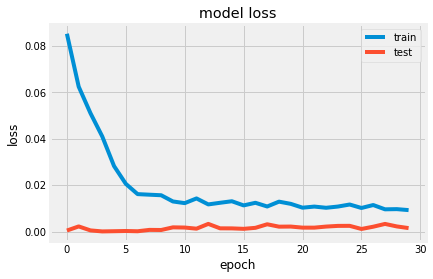

In [260]:
"""model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
#    model.add(LSTM(70))
#    model.add(Dropout(0.3))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')"""

model = Sequential()
# First LSTM layer with Dropout regularisation
model.add(LSTM(units=50, return_sequences=True, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dropout(0.2))
# Second LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
# Third LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.5))
# Fourth LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.5))
# The output layer
model.add(Dense(units=1))

# Compiling the RNN
model.compile(optimizer='adam', loss='mean_squared_error')

# fit network
history = model.fit(train_X, train_y, epochs=30, batch_size=4, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()



In [261]:
# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], 18))
# invert scaling for forecast
inv_yhat = np.concatenate((yhat, test_X[:, -17:]), axis=1)


In [262]:
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]
# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y, test_X[:, -17:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.374


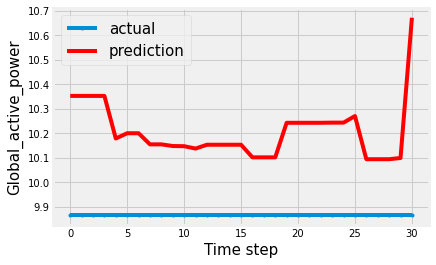

In [263]:
## time steps, every step is one hour (you can easily convert the time step to the actual time index)
## for a demonstration purpose, I only compare the predictions in 200 hours. 

aa=[x for x in range(31)]
plt.plot(aa, inv_y[:31], marker='.', label="actual")
plt.plot(aa, inv_yhat[:31], 'r', label="prediction")
plt.ylabel('Global_active_power', size=15)
plt.xlabel('Time step', size=15)
plt.legend(fontsize=15)
plt.show()